Best Score with this algorithm 0.8036 on kaggle 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import normalize

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Import dataset

In [2]:
test = pd.read_csv("test.csv",sep=',')
train = pd.read_csv("train.csv",sep=',')
sample_submission = pd.read_csv("sample_submission.csv",sep=',')

In [3]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
#train = pd.concat([train, test],axis=0).reset_index(drop=True)

Information about the dataset

Exploratory Data Analysis (EDA)

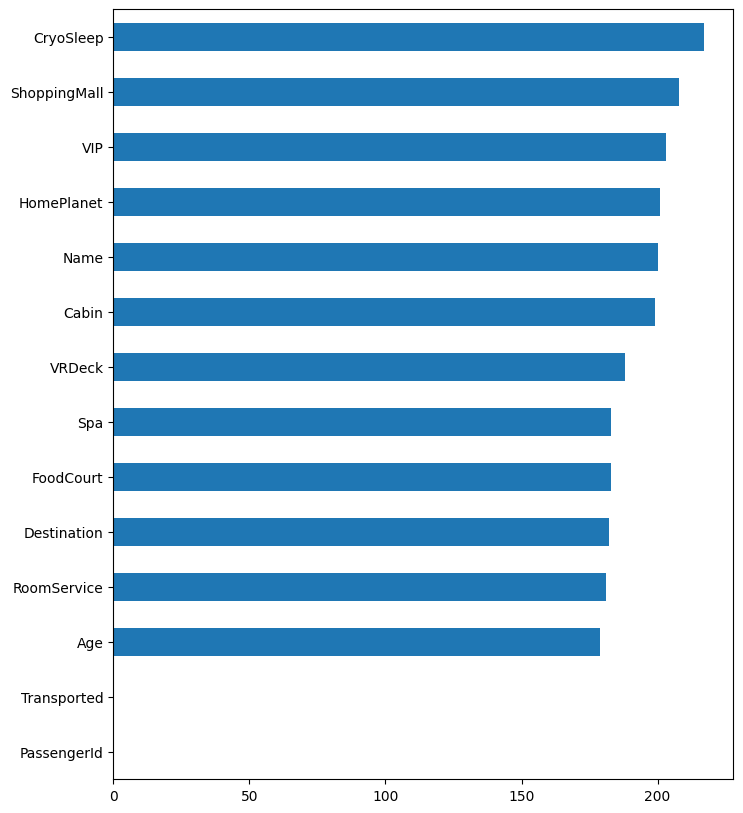

In [5]:
x=train.isna().sum()
x=x.sort_values(ascending=True)

xtoplot = x.plot(kind='barh', figsize=(8, 10))

In [6]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

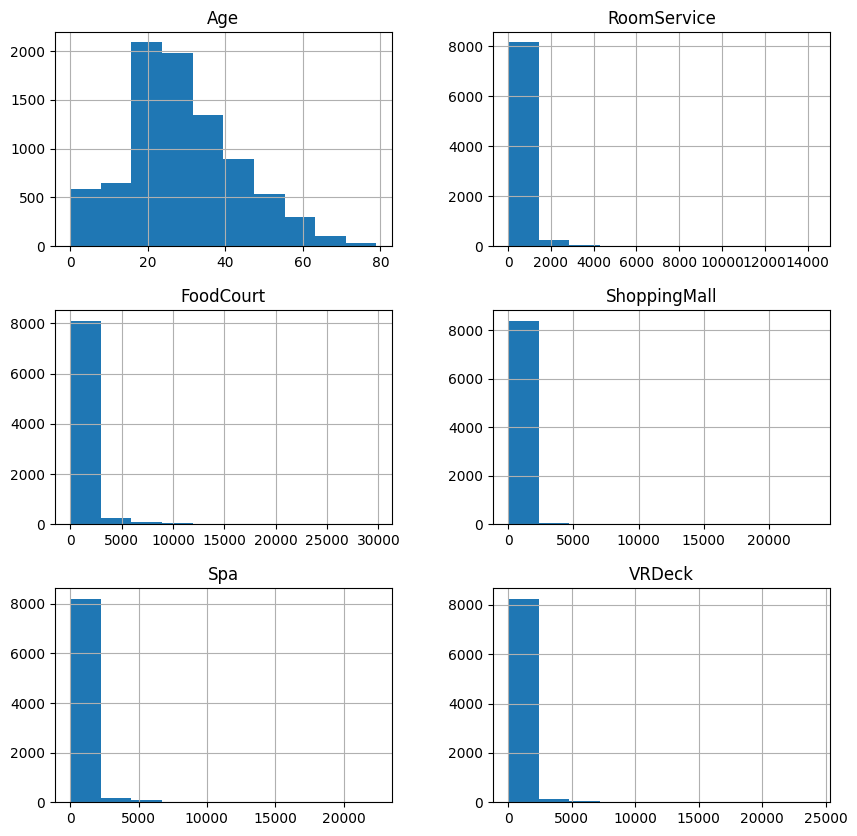

In [7]:
train.hist(figsize=(10,10))

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


<Axes: xlabel='Destination', ylabel='count'>

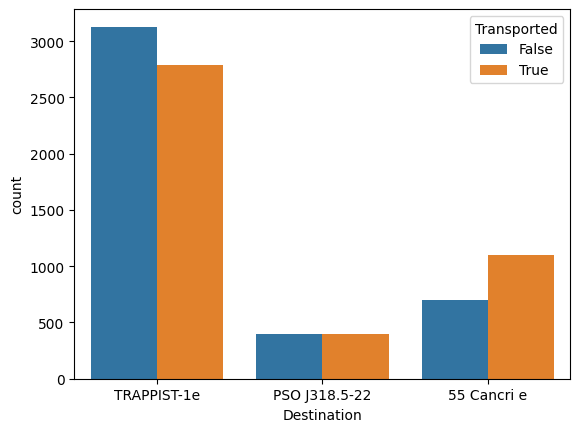

In [8]:
# Passenger destination:
print(train['Destination'].value_counts())
sns.countplot(x='Destination',hue='Transported', data=train)

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


<Axes: xlabel='HomePlanet', ylabel='count'>

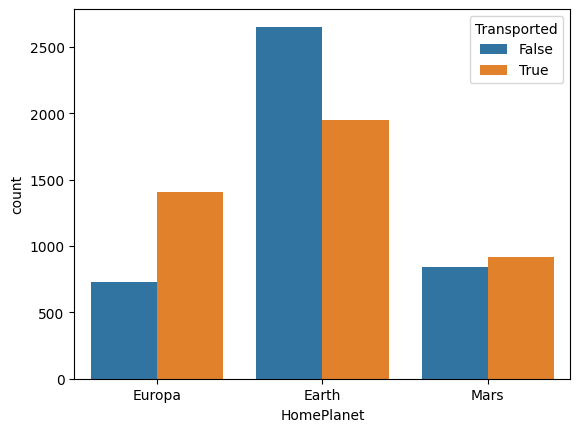

In [9]:
# HomePlanet:

print(train['HomePlanet'].value_counts())
sns.countplot(x='HomePlanet',hue='Transported', data=train)

VIP
False    8291
True      199
Name: count, dtype: int64


<Axes: xlabel='VIP', ylabel='count'>

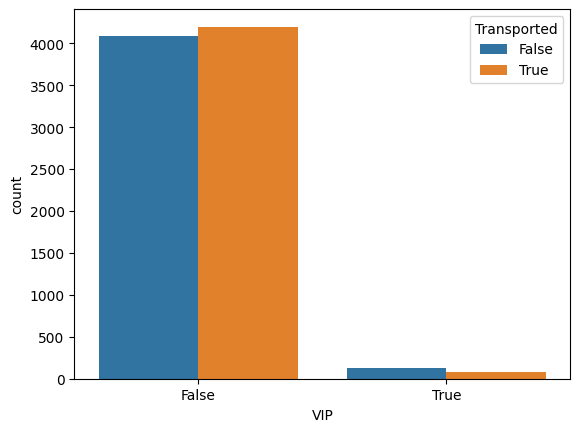

In [10]:
# Passenger destination:
print(train['VIP'].value_counts())
sns.countplot(x='VIP',hue='Transported', data=train)

CryoSleep
False    5439
True     3037
Name: count, dtype: int64


<Axes: xlabel='CryoSleep', ylabel='count'>

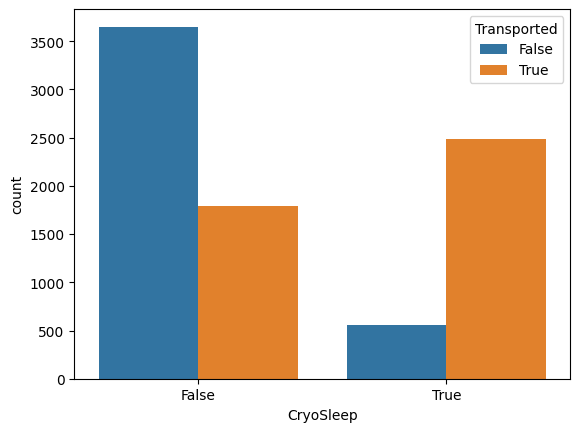

In [11]:
# CryoSleep:

print(train['CryoSleep'].value_counts())
sns.countplot(x='CryoSleep',hue='Transported', data=train)

Transported
True     4378
False    4315
Name: count, dtype: int64


<Axes: xlabel='Transported', ylabel='count'>

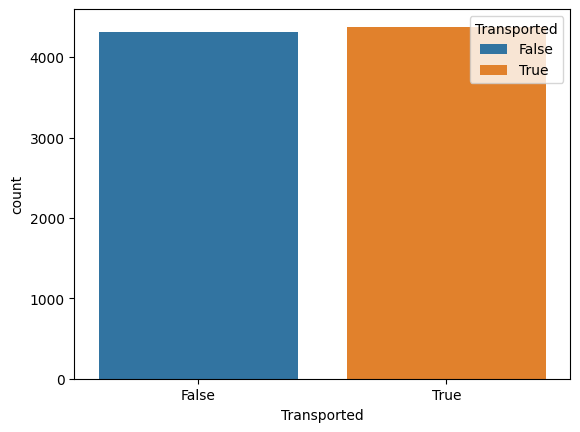

In [12]:
# Transported:

print(train['Transported'].value_counts())
sns.countplot(x='Transported',hue='Transported', data=train)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [14]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [15]:
train.describe(exclude='number')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


Data Preprocessing

NA Value

In [16]:
num_col = train.describe().columns
str_col = train.describe(exclude='number').columns
for i in num_col:
    train[i] = train[i].fillna(train[i].median())
for i in str_col:
    train[i] = train[i].fillna(train[i].mode()[0])

display(train.describe())

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [17]:
train.describe(exclude='number')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8693,8693,8693,8693,8693,8693,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Alraium Disivering,True
freq,1,4803,5656,207,6097,8494,202,4378


In [18]:
train[['DeckName','DeckNumber','DeckSide']]=train['Cabin'].str.split('/',expand=True)
train[['Group','ID']]=train['PassengerId'].str.split('_',expand=True)

In [19]:
#  object datatype columns encoding:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col_name in train.columns:
    if train[col_name].dtypes=='object':
        train[col_name]=labelencoder.fit_transform(train[col_name])
object_columns = train.select_dtypes(include='object').columns.difference(['PassengerId'])
labelencoder = LabelEncoder()
for column in object_columns:
    train[column] = labelencoder.fit_transform(train[column])

In [20]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,DeckName,DeckNumber,DeckSide,Group,ID
0,0,1,False,149,2,39.0,False,0.0,0.0,0.0,0.0,0.0,5252,False,1,0,0,0,0
1,1,0,False,2184,2,24.0,False,109.0,9.0,25.0,549.0,44.0,4502,True,5,0,1,1,0
2,2,1,False,1,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,457,False,0,0,1,2,0
3,3,1,False,1,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,7149,False,0,0,1,2,1
4,4,0,False,2186,2,16.0,False,303.0,70.0,151.0,565.0,2.0,8319,True,5,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,1,False,146,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,3524,False,0,1795,0,6213,0
8689,8689,0,True,5280,1,18.0,False,0.0,0.0,0.0,0.0,0.0,4780,False,6,548,1,6214,0
8690,8690,0,False,5285,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,3002,True,6,551,1,6215,0
8691,8691,1,False,2131,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,1596,False,4,1385,1,6216,0


In [21]:
train['Expense'] = train[['RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck']].sum(axis=1)

<Axes: >

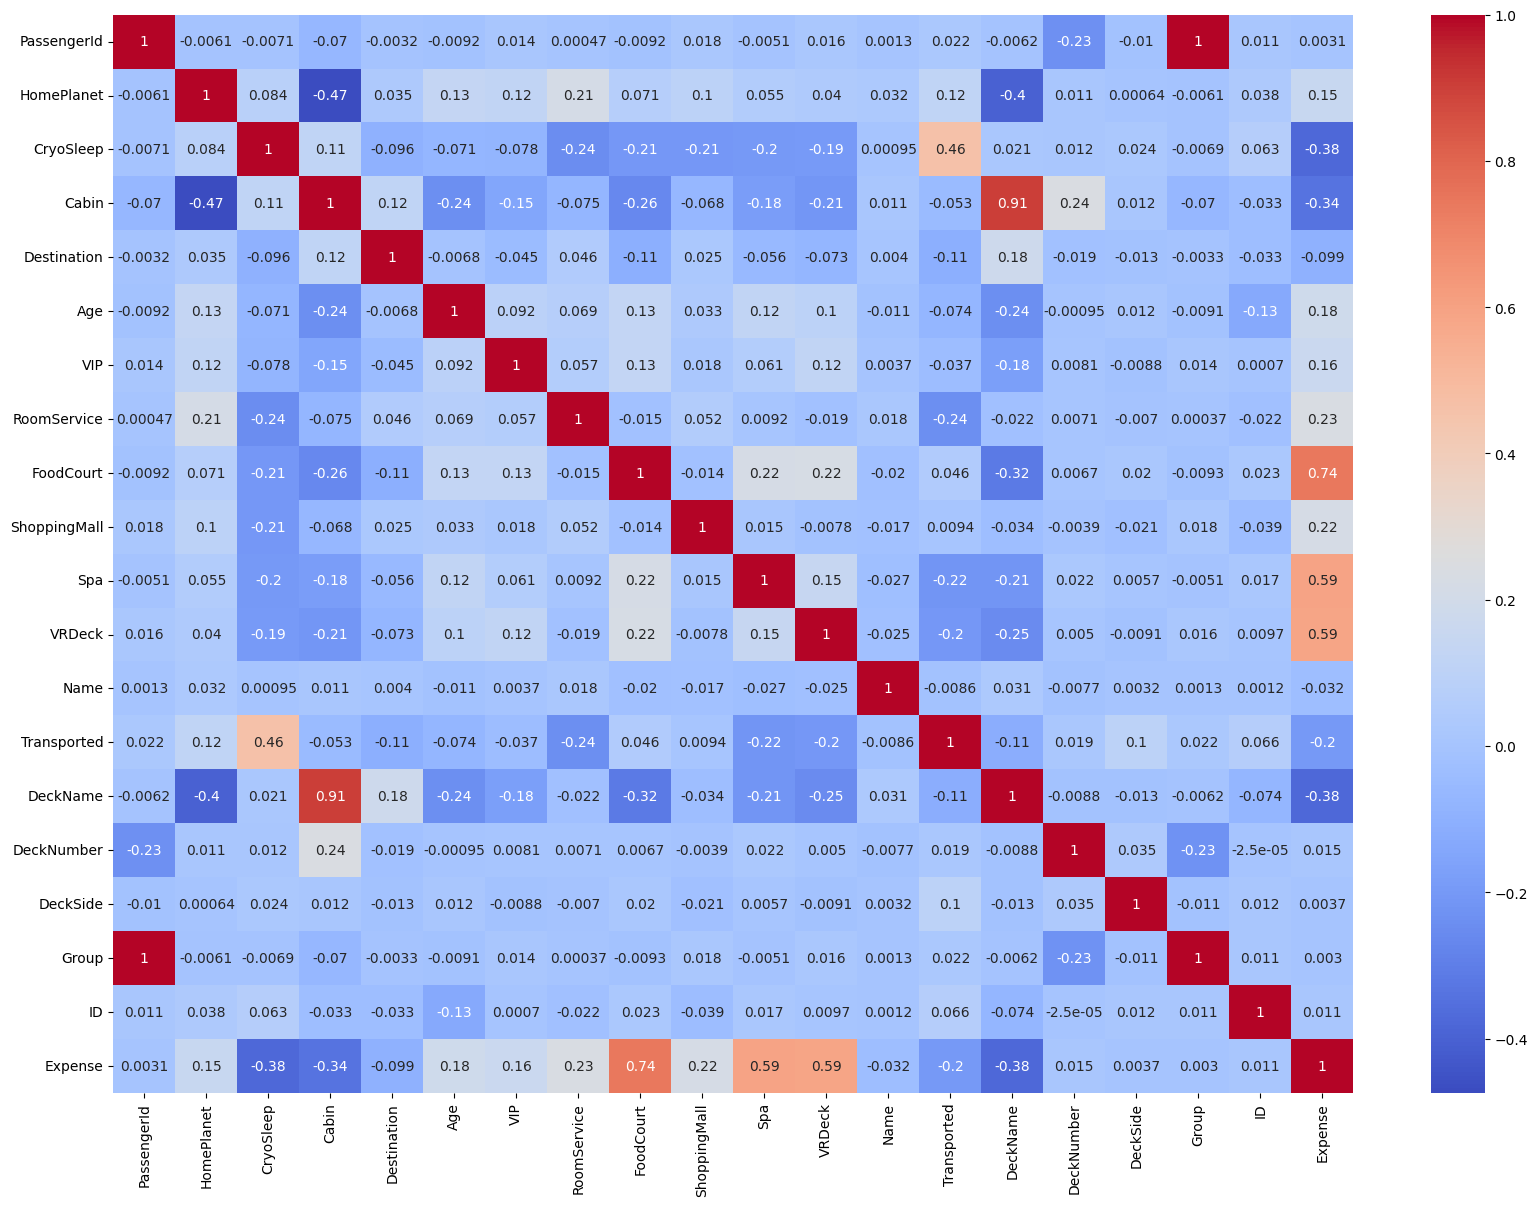

In [22]:
plt.figure(figsize=(20,14))
sns.heatmap(train.corr(), annot=True,cmap="coolwarm")

In [23]:
train.corr()['Transported'].drop('Transported').sort_values(ascending=False)

CryoSleep       0.460132
HomePlanet      0.115461
DeckSide        0.101397
ID              0.066390
FoodCourt       0.045583
Group           0.021825
PassengerId     0.021775
DeckNumber      0.019393
ShoppingMall    0.009391
Name           -0.008598
VIP            -0.037261
Cabin          -0.052972
Age            -0.074233
Destination    -0.108152
DeckName       -0.113992
Expense        -0.199514
VRDeck         -0.204874
Spa            -0.218545
RoomService    -0.241124
Name: Transported, dtype: float64

In [24]:
Y_train = train['Transported']

X_train = train.drop(['PassengerId', 'Name', 'Transported','Cabin'], axis=1)

Cleaning the test.csv to have the submisssion.csv  for the Kaggle

In [25]:
merged_test = pd.merge(sample_submission, test, on='PassengerId')

In [26]:
X_submission = merged_test.drop(['PassengerId', 'Name','Cabin','Transported'], axis=1)

In [27]:
num_col = X_submission.describe().columns
str_col = X_submission.describe(exclude='number').columns
for i in num_col:
    X_submission[i] = X_submission[i].fillna(X_submission[i].median())
for i in str_col:
    X_submission[i] = X_submission[i].fillna(X_submission[i].mode()[0])



display(X_submission.describe())
X_submission.isna().sum()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,28.601590,215.062427,428.592238,173.233107,295.895955,304.898293
std,14.032629,601.914503,1510.155974,554.991776,1104.872018,1235.991811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,48.000000,66.000000,27.000000,43.000000,31.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [28]:
X_submission[['DeckName','DeckNumber','DeckSide']]=merged_test['Cabin'].str.split('/',expand=True)
X_submission[['Group','ID']]=merged_test['PassengerId'].str.split('_',expand=True)

#  object datatype columns encoding:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col_name in X_submission.columns:
    if X_submission[col_name].dtypes=='object':
        X_submission[col_name]=labelencoder.fit_transform(X_submission[col_name])
object_columns = X_submission.select_dtypes(include='object').columns.difference(['PassengerId'])
labelencoder = LabelEncoder()
for column in object_columns:
    X_submission[column] = labelencoder.fit_transform(X_submission[column])

X_submission['Expense'] = X_submission[['RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck']].sum(axis=1)



In [29]:
X_submission

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,DeckName,DeckNumber,DeckSide,Group,ID,Expense
0,0,True,2,27.0,False,0.0,0.0,0.0,0.0,0.0,6,820,1,0,0,0.0
1,0,False,2,19.0,False,0.0,9.0,0.0,2823.0,0.0,5,927,1,1,0,2832.0
2,1,True,0,31.0,False,0.0,0.0,0.0,0.0,0.0,2,0,1,2,0,0.0
3,1,False,2,38.0,False,0.0,6652.0,0.0,181.0,585.0,2,1,1,3,0,7418.0
4,0,False,2,20.0,False,10.0,0.0,635.0,0.0,0.0,5,1029,1,4,0,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,True,2,34.0,False,0.0,0.0,0.0,0.0,0.0,6,452,1,3058,1,0.0
4273,0,False,2,42.0,False,0.0,847.0,17.0,10.0,144.0,8,1505,2,3059,0,1018.0
4274,2,True,0,26.0,False,0.0,0.0,0.0,0.0,0.0,3,816,0,3060,0,0.0
4275,1,False,2,26.0,False,0.0,2680.0,0.0,0.0,523.0,3,817,0,3061,0,3203.0


Data Splitting

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.2, random_state=42)

Model

Finding the Best Model



classifiers = {
    'XGBoost' : XGBClassifier()
}

param_grid = {
    'XGBoost' : {'n_estimators': [50, 100, 200,1000], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth':[3,5,7],'subsample':[0.6,0.8,1],'colsample_bytree':[0.6,0.8]}
}   

best_score=0

for clf_name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid[clf_name], cv=5)
    grid_search.fit(X_train, Y_train)
    best_clf = grid_search.best_estimator_

    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_

    predictions = best_clf.predict(X_test)

    score = accuracy_score(Y_test, predictions)
    print(f"{clf_name} - Best Score: {grid_search.best_score_}, Test Score: {score}, Best Parameters: {grid_search.best_params_}")

best_model

In [31]:
model_XGBoost = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    n_estimators=1000,  
    learning_rate=0.01,  
    max_depth=3,  
    subsample=0.8,  
    colsample_bytree=0.8  
)


model_XGBoost.fit(X_train, Y_train)
predictions_xgboost = model_XGBoost.predict(X_test)
Score_xgboost = accuracy_score(Y_test, predictions_xgboost)
print(Score_xgboost)

0.7912593444508338


Best Model

In [32]:
model_XGBoost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Writing the submission file

In [33]:
y_pred=model_XGBoost.predict(X_submission)

In [34]:
submission = np.where(y_pred==1,True, False)
submission_style = pd.read_csv('sample_submission.csv')
submission_style['Transported'] = submission
submission_style.to_csv('submission.csv',index=False)
submission_style.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
